<div style="display: flex; justify-content: center;">
    <img src="IA/recoo.png" style="border-radius: 20px; width: 75%;">
</div>


<small>Imagen creada por IA generativa usando el siguiente pront "Generate an image depicting a car being towed by a vehicle removal tow truck in Madrid".<small>

# RETIRADA DE VEHÍCULOS EN VÍA PÚBLICA, MADRID.
> ### Vehículos retirados de la via púlica entre los años 2016 y 2023.


### TEMA

La retirada de vehículos de la vía pública, gracias a dataset disponibles en internet, puede ser objeto de un EDA interesante, con diversos enfoques posibles.    
Por un lado, se puede estudiar el tiempo que estos vehículos pasan en el depósito según sea su tipo, así como la cantidad de vehículos que llegan al depósito  
en función de la fecha y la hora.

También se puede investigar si existe alguna relación entre la ubicación y el tipo de vehículos retirados de esa zona.    
El motivo por el cual se retiró el vehículo también es interesante de estudiar. Por ejemplo, podríamos suponer que los motivos relacionados con el consumo  
de alcohol serán más frecuentes los fines de semana o días festivos, así como que los vehículos retirados de zonas de carga y descarga serán menos frecuentes estas mismas fechas. 


### HIPÓTESIS

Parto de la hipótesis de que el motivo de retirada estará bastante influenciado por la fecha/hora,  
mientras que el tiempo que permanezca en el depósito estará influenciado por el tipo de vehículo.  
Es fácil pensar que un camión o un vehículo pesado pasará menos tiempo en el depósito que un coche.
>El tipo de vehículos que se encuentran en los datasets usados en este EDA está clasificado así:
'Motocicleta, Motocarro, Coche, Camión y Vehículo pesado'.  
Hubiera resultado interesante contar con más detalles, por ejemplo marca, año del coche, subtipo( berlina, SUV, electrico...),  
ya que sus características podrían hacer aún más interesante el EDA. ¿Pasan más tiempo en el depósito los coches viejos?   
¿Se retiran más coches de lujo por mal aparcamiento? Al no disponer de estos datos, estas preguntas no podrán ser respondidas en este EDA."

Otra hipótesis que planteo es que tanto la grúa (se dispone del dato de la grúa que retiró cada vehículo) como el depósito al que se envió cada vehículo  
tendrán una relación con la cantidad de vehículos retirados. Además, el turno (es decir, mañana, tarde y noche) también podría estar relacionado  
tanto con la cantidad de vehículos retirados como con el motivo por el que estos se retiraron.


## OBTENCIÓN DE LOS DATOS


Los datasets fueron obtenidos de la página del Ministerio para la Transformación Digital y de la Función Pública.  
Puedes acceder a la página de descarga de los datasets haciendo clic [aquí](https://datos.gob.es/en/catalogo/l01280796-retirada-de-vehiculos-en-via-publica-grua-municipal)

Para realizar el EDA se usarán 21 archivos CSV descargados de la página antes mencionada.  
De estos archivos, 16 compondrán el dataset principal. Ocho corresponden a la entrada del vehículo en el depósito  
y otros ocho a su salida. El campo "idVehiculo" permite que ambas tablas se puedan sincronizar.

Los 5 restantes son:

- **Depositos.csv:** Con información sobre los distintos depósitos.

- **Motivosderetirada.csv:** Una tabla con información en español e inglés de los códigos de retirada, con 61 motivos distintos.

- **Tipos_Turno.csv:** Una tabla con información en español e inglés de los códigos de turno. Este código se utilizará para cambiar  
en el dataframe principal el código por "mañana", "tarde" o "noche".

- **Tipos_Vehiculos.csv:** Igual que Tipos_turno.csv pero con los distintos tipos de vehículos.

- **300227-0-grua-depositos.csv** Información sobre los depósitos, mejor que **Depositos.csv**, en el que además quedan recogidas sus coordenadas, latitud y longitud.  
Este último ha sido descargado de [aquí](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=408dd7c1426b3610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default
)





## PRESENTACIÓN DE LOS DATOS 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### 2023Entradas.csv ↓

In [ ]:
entradas2023 = pd.read_csv("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/datos/entradas/2023Entradas.csv", encoding='UTF-8', sep=';')

entradas2023.head(15)

>>Vemos que "tipoVehiculo" y "turno" convendría cambiar el código a su tipo de vehículo o turno correspondiente, "motivo", por la cantidad de códigos, tal vez no interese.

#### 2023Salidas.csv ↓

In [4]:
salidas2023 = pd.read_csv("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/datos/salidas/2023Salidas.csv", encoding='UTF-8', sep=';')
salidas2023 = salidas2023.sort_values(by='fechaEntrada')

salidas2023.head(15)

,idVehiculo,tipoVehiculo,motivo,turno,grua,tipoVia,via,numero,cp,depositoEntrada,fechaEntrada,depositoSalida,fechaSalida
28398,VC20230101100229,4,16,1,S343,CALLE,DE LA SECOYA,3,28054,VICALVARO,01/01/2023 10:01,VICALVARO,02/01/2023 17:37
9990,ES20230101100303,3,13,1,S317,TRAVESIA,EDUARDO BARREIROS,NaN,28041,ESCUADRON,01/01/2023 10:02,ESCUADRON,01/01/2023 15:44
35559,CO20230101101454,3,7,1,S369,PASEO,DEL PRADO,NaN,28014,COLON,01/01/2023 10:07,COLON,01/01/2023 11:29
10597,PI20230101103925,3,19,1,S323,CALLE,ESCALONA,26,28024,PASEO IMPERIAL,01/01/2023 10:37,PASEO IMPERIAL,02/01/2023 10:58
9635,ES20230101105827,3,13,1,S313,CALLE,CONDE DE PEÑALVER,24,28006,ESCUADRON,01/01/2023 10:57,ESCUADRON,03/01/2023 10:15
31276,ES20230101115309,3,24,1,S350,AVENIDA,PORTUGAL,NaN,28011,ESCUADRON,01/01/2023 11:51,ESCUADRON,01/01/2023 13:51
21551,VC20230101120859,3,28,1,S340,PLAZA,ALCALDE MORENO TORRES,NaN,28050,VICALVARO,01/01/2023 12:07,VICALVARO,02/01/2023 20:13
4740,VC20230101130558,4,7,1,S314,CALLE,VIRGEN DE LLUCH,101,28027,VICALVARO,01/01/2023 13:04,VICALVARO,01/01/2023 17:23
8361,PI20230101133403,3,12,1,S327,CALLE,ALCALA,NaN,28027,PASEO IMPERIAL,01/01/2023 13:29,PASEO IMPERIAL,03/01/2023 16:58
21683,M320230101135059,3,46,1,S317,CALLE,ARROYO DEL OLIVAR,NaN,28053,MEDIODIA 3,01/01/2023 13:49,MEDIODIA 3,02/01/2023 11:06


>>Al observar el dataframe **'2023Salida.csv'** ordenado según la fecha de entrada, la cual también aparece en 'salida', puede parecer que sus datos no concuerdan con **'2023Entradas.csv'**. Esto se debe a que los vehículos que llevan muchos años en el depósito aparecen primero (los ordenamos por fecha de entrada). Uno de los datos que parece no concordar es el 'idVehiculo', que no tiene relación con los utilizados en los años 2016-2023. Esto sería un problema ya que **'idVehiculo'** es el dato que usaremos para relacionar ambas tablas. Además, hay menos información sobre estos vehículos, los que entraron antes de 2023.

In [5]:
salidas2023.iloc[2680:2692]

,idVehiculo,tipoVehiculo,motivo,turno,grua,tipoVia,via,numero,cp,depositoEntrada,fechaEntrada,depositoSalida,fechaSalida
12740,VC20230303184421,3,14,2,S314,CALLE,CORREGIDOR JUAN FRANCISCO DE LUJAN,104,28030,VICALVARO,03/03/2023 18:42,VICALVARO,22/09/2023 9:53
22669,VC20230303184831,3,14,2,S301,CALLE,SITIO DEL ESCORIAL,15,28054,VICALVARO,03/03/2023 18:44,VICALVARO,28/09/2023 10:01
22718,CO20230303185202,3,44,2,S356,CALLE,TIMOTEO DOMINGO,27,28017,COLON,03/03/2023 18:51,COLON,04/03/2023 16:20
19423,VC20230303191804,3,14,2,S313,CALLE,POTOSI,9,28016,VICALVARO,03/03/2023 19:16,VICALVARO,07/03/2023 18:37
6530,VC20230303193127,3,14,2,S340,CALLE,ARCOS DE JALÓN,100,28037,VICALVARO,03/03/2023 19:30,VICALVARO,08/03/2023 16:48
8374,VC20230303193933,3,14,2,S357,CALLE,ALCALA,237,28027,VICALVARO,03/03/2023 19:37,VICALVARO,04/03/2023 13:01
7888,VC20230303193817,4,14,2,S310,CALLE,ENRIQUE LARRIETA,3,28036,VICALVARO,03/03/2023 19:37,VICALVARO,10/05/2023 10:31
35572,ES20230303195718,3,13,2,S320,CALLE,RICARDO BELTRAN ROZPIDE,15,28026,ESCUADRON,03/03/2023 19:55,ESCUADRON,04/03/2023 16:52
17772,CO20230303010636,3,7,3,S357,CALLE,ATOCHA,18,28012,COLON,03/03/2023 1:00,COLON,03/03/2023 21:56
25651,CO20230303012456,4,46,3,S360,CALLE,MARQUESA DE SILVELA,18,28026,COLON,03/03/2023 1:20,COLON,03/03/2023 11:44


>>Pero cuando exploramos la tabla, vemos que efectivamente los **“idVehículos”** coinciden, así como la información en la tabla.  
>>>Como curiosidad, el primer vehículo que entró al depósito en Madrid en el año 2023 fue por un accidente.

#### Dataframe de los depositos 
>#### El bueno

In [7]:
depositos = pd.read_csv("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/datos/auxiliares/300227-0-grua-depositos.csv", encoding='ISO-8859-1', sep=';')
depositos = depositos.drop(columns=['TELEFONO', 'FAX', 'EMAIL', 'TIPO', 'DESCRIPCION-ENTIDAD', 'HORARIO', 'EQUIPAMIENTO', 'TRANSPORTE', 'DESCRIPCION', 'ACCESIBILIDAD', 'CONTENT-URL', 'NOMBRE-VIA', 'CLASE-VIAL', 'TIPO-NUM', 'NUM', 'PLANTA', 'PUERTA', 'ESCALERAS', 'ORIENTACION', 'PROVINCIA'])
depositos

,PK,NOMBRE,LOCALIDAD,CODIGO-POSTAL,COD-BARRIO,BARRIO,COD-DISTRITO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,23934,Depósito de la Grúa. Base de Colón,MADRID,28001,1,RECOLETOS,4,SALAMANCA,441472,4475155,40.424971,-3.689957
1,4678745,Depósito de la Grúa. Base de El Escuadrón,MADRID,28035,3,CIUDAD UNIVERSITARIA,9,MONCLOA-ARAVACA,437590,4476386,40.435778,-3.735837
2,5352784,Depósito de la Grúa. Base de Nuestra Señora de...,MADRID,28036,6,CASTILLA,5,CHAMARTIN,442422,4480358,40.471909,-3.679230
3,5634411,Depósito de la Grúa. Base de Vicálvaro,MADRID,28052,1,CASCO H.VICALVARO,19,VICALVARO,450565,4472448,40.401175,-3.582559
4,23932,Depósito de la Grúa. Base del Paseo Imperial,MADRID,28005,1,IMPERIAL,2,ARGANZUELA,439063,4473067,40.405989,-3.718153
5,23938,Depósito de la Grúa. Bases de Mediodía II y Me...,MADRID,28031,1,CASCO H.VALLECAS,18,VILLA DE VALLECAS,444929,4468482,40.365093,-3.648629


>> Para una visualización más cómoda, las columnas menos interesantes se han eliminado de la vista.

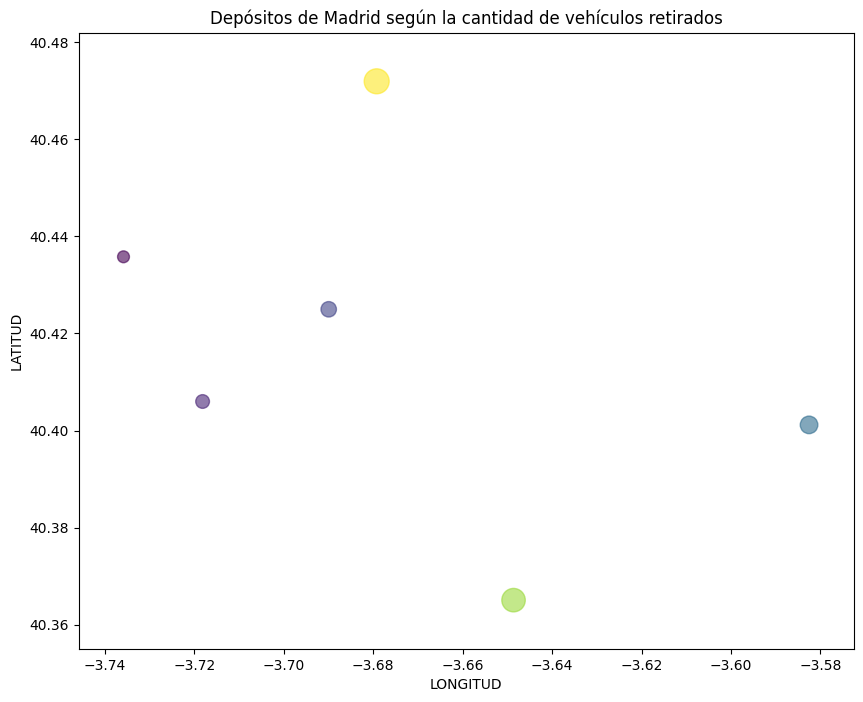

In [8]:
plt.figure(figsize=(10, 8))  
vehiculos_retirados = pd.Series([12350, 7300, 32311, 16012, 9752, 28532]) # Estos datos son inventados.
depositos['vehiculos retirados'] = vehiculos_retirados # Esta columna es únicamente para la impresión de esta figura.
tamanio_puntos = depositos['vehiculos retirados'] / 100  
colores = depositos['vehiculos retirados']  
plt.scatter(depositos['LONGITUD'], depositos['LATITUD'], s=tamanio_puntos, c=colores, cmap='viridis', alpha=0.6)
plt.ylim(min(depositos['LATITUD']) - 0.01, max(depositos['LATITUD']) + 0.01)
plt.xlim(min(depositos['LONGITUD']) - 0.01, max(depositos['LONGITUD']) + 0.01)
plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')
plt.title("Depósitos de Madrid según la cantidad de vehículos retirados")
plt.show()


>>Superponiendo un scatterplot de este tipo, pero con los datos reales, sobre una imagen aérea de Madrid se puede tener una idea clara y visual sobre la diferencia, si es que existe, en la cantidad de vehículos que recibe cada depósito.

<img src="./IA/grui.png" width=600><sub><sup>  

<small>Imagen creada por IA generativa usando el siguiente pront "Genera una imagen tipo comic, blanco/negro de un gruista saludando  
y su grua de retirada de vehiculos" despues fue editada con paint.<small>